In [24]:
import xarray as xr
from drcstools.read_data import read_netcdfs
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cmocean
import matplotlib.colors as mcolors
import numpy as np


In [9]:
# filepath1 = "/silod4/boergel/MOM_UERRA_3nm_solrad_UERRA/R05/balt-3nm-skag-v02-r05_????"
filepath1 = "/silod9/boergel/MOMoriginalBMIP/"
# filepath2 = "/silod5/boergel/model_exp/MOM_UERRA_hlrn/3nm/R04b/balt-3nm-skag-v02-r04_????"

In [10]:
dsetFull = read_netcdfs(
    "/silod9/boergel/MOMconvRiverNew2/????/salt_fld_????.nc",
    dim="time",
    transform_func=lambda ds:ds.resample(time="1Y").mean(),
    transform_calendar="standard"   
)
dset2Full = read_netcdfs(
    "/silod9/boergel/MOMoriginalBMIP/????/salt_fld_????.nc",
    dim="time",
    transform_func=lambda ds:ds.resample(time="1Y").mean(),
    transform_calendar="standard"   
)

 66%|██████▌   | 31/47 [00:00<00:00, 72.14it/s]

100%|██████████| 22/22 [00:00<00:00, 75.12it/s]


/silod9/boergel/MOMoriginalBMIP/2002/salt_fld_2002.nc
This one failed.


In [11]:
diff = dsetFull.sel(time=slice("1981", "2000")).salt - dset2Full.sel(time=slice("1981", "2000")).salt

In [76]:
levels=list(np.arange(0,20,100))+list(np.arange(20,30,4))

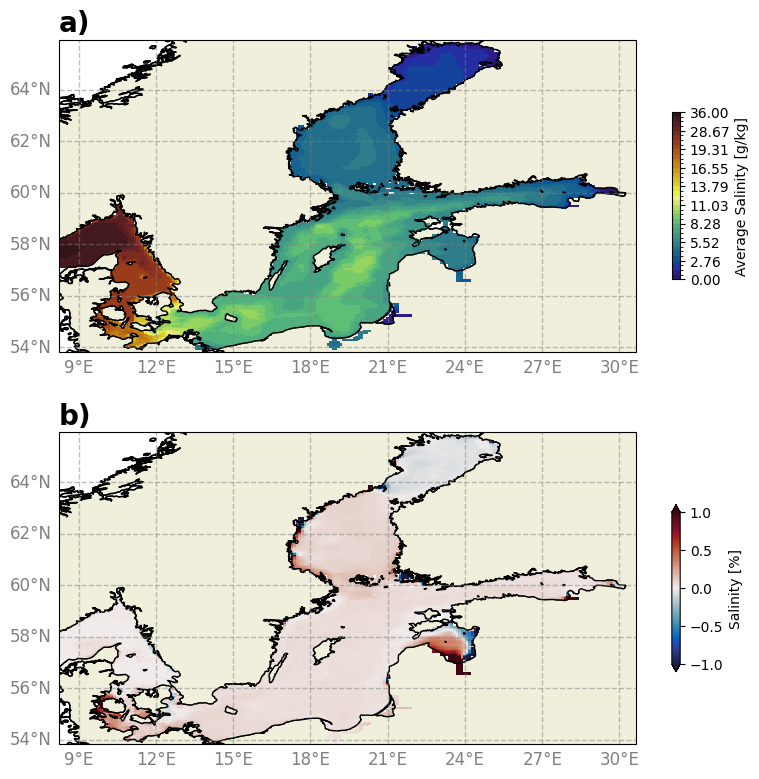

In [146]:
# Setup the map projection
projection = ccrs.PlateCarree()

# Create a figure with 2 subplots side by side
fig, axs = plt.subplots(2,1 , figsize=(8, 8), subplot_kw={'projection': projection})

# Plotting on the first subplot (original)
ax = axs[1]  # First subplot for the original visualization
(diff.mean("time")/dset2Full.salt.mean("time")*100).plot(ax=ax, cmap=cmocean.cm.balance, 
          cbar_kwargs={'shrink': 0.5, 'label': 'Salinity [%]'}, vmin=-1., vmax=1)

# Adding features to the first subplot
ax.coastlines(resolution='10m', color='black', linewidth=1)
ax.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=cfeature.COLORS['land'])
#ax.add_feature(cfeature.OCEAN, zorder=0, edgecolor='black', facecolor=cfeature.COLORS['water'])
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 12, 'color': 'gray'}
gl.ylabel_style = {'size': 12, 'color': 'gray'}
ax.set_title('b)', loc="left", fontsize=20, fontweight="bold")

# Plotting the second subplot (just the diff)
ax2 = axs[0]  # Second subplot for the difference only

levels=list(np.linspace(0, 20, 30)) + list(np.linspace(25,36,7))

colors1 = cmocean.cm.haline(np.linspace(0., 1, 128))
colors2 = cmocean.cm.solar_r(np.linspace(0, 1, 128))

colors = np.vstack((colors1, colors2))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

mappable = (dset2Full.salt.mean("time")).plot.pcolormesh(ax=ax2, cmap=mymap,#plt.cm.Set2,
          cbar_kwargs={'shrink': 0.5, 'label': 'Average Salinity [g/kg]'}, levels=levels)


ax2.coastlines(resolution='10m', color='black', linewidth=1)
ax2.add_feature(cfeature.LAND, zorder=0, edgecolor='black', facecolor=cfeature.COLORS['land'])
#ax2.add_feature(cfeature.OCEAN, zorder=0, edgecolor='black', facecolor=cfeature.COLORS['water'])
gl2 = ax2.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                   linewidth=1, color='gray', alpha=0.5, linestyle='--')
gl2.top_labels = False
gl2.right_labels = False
gl2.xlabel_style = {'size': 12, 'color': 'gray'}
gl2.ylabel_style = {'size': 12, 'color': 'gray'}
ax2.set_title('a)', loc="left", fontsize=20, fontweight="bold")

plt.tight_layout()  # Adjust layout to not overlap
plt.savefig("figures/evaluation_MOM.png", dpi=300)

In [15]:
dset = read_netcdfs(
    "/silod9/boergel/MOMconvRiverNew2/????/rregion_GotlandDeepBY15.nc.0140",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1M").mean(),
    transform_calendar="standard"   
)
dset2 = read_netcdfs(
    "/silod9/boergel/MOMoriginalBMIP/????/rregion_GotlandDeepBY15.nc.????",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1M").mean(),
    transform_calendar="standard"   
)


100%|██████████| 49/49 [00:13<00:00,  3.56it/s]


/silod9/boergel/MOMconvRiverNew2/2009/rregion_GotlandDeepBY15.nc.0140
This one failed.


100%|██████████| 29/29 [00:09<00:00,  3.14it/s]

/silod9/boergel/MOMoriginalBMIP/2009/rregion_GotlandDeepBY15.nc.0140
This one failed.


In [ ]:
dsetBY2 = read_netcdfs(
    "/silod9/boergel/MOMconvRiverNew2/????/rregion_ArkonaBY2.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1M").mean(),
    transform_calendar="standard"   
)
dset2BY2 = read_netcdfs(
    "/silod9/boergel/MOMoriginalBMIP/????/rregion_ArkonaBY2.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1M").mean(),
    transform_calendar="standard"   
)


100%|██████████| 49/49 [00:17<00:00,  2.79it/s]


/silod9/boergel/MOMconvRiverNew2/2009/rregion_ArkonaBY2.nc.0033
This one failed.


100%|██████████| 29/29 [00:08<00:00,  3.45it/s]

/silod9/boergel/MOMoriginalBMIP/2009/rregion_ArkonaBY2.nc.0033
This one failed.


In [ ]:
dsetBY5 = read_netcdfs(
    "/silod9/boergel/MOMconvRiverNew2/????/rregion_BornholmDeepBY5.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1M").mean(),
    transform_calendar="standard"   
)
dset2BY5 = read_netcdfs(
    "/silod9/boergel/MOMoriginalBMIP/????/rregion_BornholmDeepBY5.nc.*",
    dim="time",
    transform_func=lambda ds:ds.salt.resample(time="1M").mean(),
    transform_calendar="standard"   
)

  0%|          | 0/49 [00:00<?, ?it/s]

100%|██████████| 49/49 [00:14<00:00,  3.27it/s]


/silod9/boergel/MOMconvRiverNew2/2009/rregion_BornholmDeepBY5.nc.0052
This one failed.


100%|██████████| 29/29 [00:06<00:00,  4.23it/s]

/silod9/boergel/MOMoriginalBMIP/2009/rregion_BornholmDeepBY5.nc.0052
This one failed.


In [148]:
validationpath="/silos/thomas/DATA/STATS"

In [149]:
BY15data = read_netcdfs(f"{validationpath}/271/SAL/sal_271_vers_2024.nc", dim="time", transform_func=None, transform_calendar="standard")

100%|██████████| 1/1 [00:00<00:00, 11.09it/s]


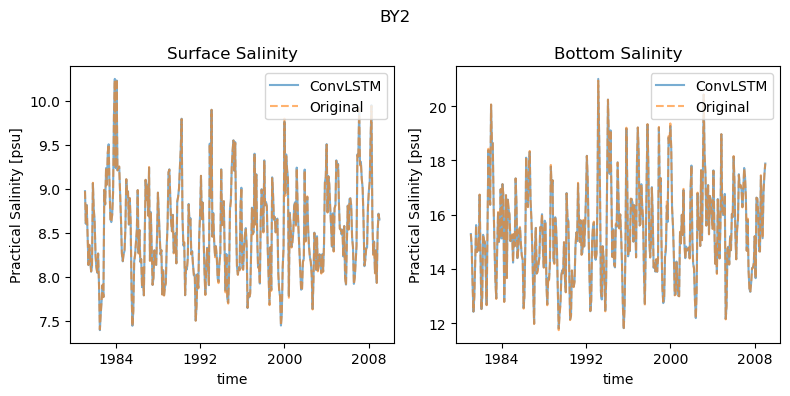

In [ ]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
f.suptitle("BY2")
dsetBY2.sel(time=slice("1981","2011")).dropna("st_ocean_sub05").isel(st_ocean_sub05=0).plot(ax=ax,label="ConvLSTM", alpha=0.6)
dset2BY2.sel(time=slice("1981","2011")).dropna("st_ocean_sub05").isel(st_ocean_sub05=0).plot(ax=ax,label="Original", alpha=0.6, ls="--")
ax.legend()

dsetBY2.sel(time=slice("1981","2011")).dropna("st_ocean_sub05").isel(st_ocean_sub05=-1).plot(ax=bx,label="ConvLSTM", alpha=0.6)
dset2BY2.sel(time=slice("1981","2011")).dropna("st_ocean_sub05").isel(st_ocean_sub05=-1).plot(ax=bx,label="Original", alpha=0.6, ls="--")
bx.legend()
ax.set_title("Surface Salinity")
bx.set_title("Bottom Salinity")

f.tight_layout()

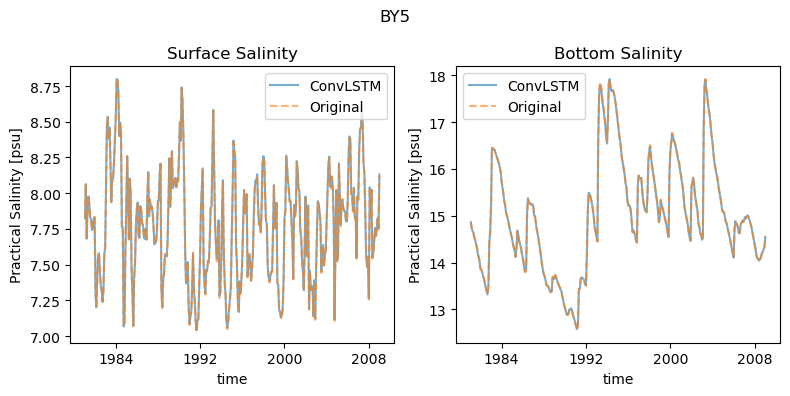

In [ ]:
f, (ax, bx) = plt.subplots(1,2, figsize=(8,4))
f.suptitle("BY5")
dsetBY5.sel(time=slice("1981","2011")).dropna("st_ocean_sub06").isel(st_ocean_sub06=0).plot(ax=ax,label="ConvLSTM", alpha=0.6)
dset2BY5.sel(time=slice("1981","2011")).dropna("st_ocean_sub06").isel(st_ocean_sub06=0).plot(ax=ax,label="Original", alpha=0.6, ls="--")
ax.legend()

dsetBY5.sel(time=slice("1981","2011")).dropna("st_ocean_sub06").isel(st_ocean_sub06=-1).plot(ax=bx,label="ConvLSTM", alpha=0.6)
dset2BY5.sel(time=slice("1981","2011")).dropna("st_ocean_sub06").isel(st_ocean_sub06=-1).plot(ax=bx,label="Original", alpha=0.6, ls="--")
bx.legend()
ax.set_title("Surface Salinity")
bx.set_title("Bottom Salinity")

f.tight_layout()

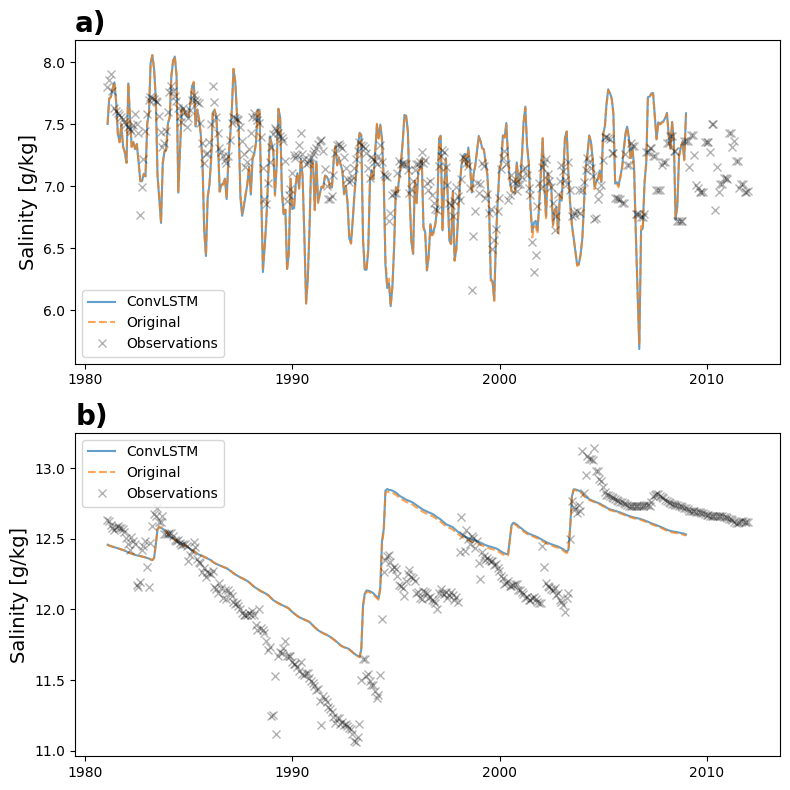

In [165]:
f, (ax, bx) = plt.subplots(2,1, figsize=(8,8))
dset.sel(time=slice("1981","2011")).dropna("st_ocean_sub09").isel(st_ocean_sub09=0).plot(ax=ax,label="ConvLSTM", alpha=0.7)
dset2.sel(time=slice("1981","2011")).dropna("st_ocean_sub09").isel(st_ocean_sub09=0).plot(ax=ax,label="Original", alpha=0.7, ls="--")
BY15data.sel(time=slice("1981","2011")).isel(depth=0).salt.plot(ax=ax, ls="", marker="x", alpha = 0.3, label="Observations", color="black")
ax.legend()

dset.sel(time=slice("1981","2011")).dropna("st_ocean_sub09").isel(st_ocean_sub09=-1).plot(ax=bx,label="ConvLSTM", alpha=0.7)
dset2.sel(time=slice("1981","2011")).dropna("st_ocean_sub09").isel(st_ocean_sub09=-1).plot(ax=bx,label="Original", alpha=0.7, ls="--")
BY15data.sel(time=slice("1981","2011")).sel(depth=slice(230,240)).mean("depth").salt.plot(ax=bx, ls="", marker="x", alpha = 0.3, label="Observations", color="black")

bx.legend()

ax.set_title('a)', loc="left", fontsize=20, fontweight="bold")
bx.set_title('b)', loc="left", fontsize=20, fontweight="bold")
ax.set_title('', fontweight="bold")
bx.set_title('',fontweight="bold")

ax.set_ylabel("Salinity [g/kg]",fontsize=14)
bx.set_ylabel("Salinity [g/kg]",fontsize=14)
ax.set_xlabel("",fontsize=14)
bx.set_xlabel("",fontsize=14)

f.tight_layout()
plt.savefig("figures/by15_model.png",dpi=300)